#Titanic  Data 

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np



# Data Loading 

In [ ]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')
df_sub=pd.read_csv('gender_submission.csv')

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df_sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
df_train.shape

(891, 12)

In [ ]:
print(df_train.columns.values)


['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [ ]:
print(df_test.columns.values)

['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


In [ ]:
combine=[df_train,df_test]
dataset=pd.concat(combine)

In [ ]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
dataset.shape

(1309, 12)

In [ ]:
dataset.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df_train.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Wiseman, Mr. Phillippe",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [ ]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
#pcclass =1 is more important than others 

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
df_train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)
# sex is super important 

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
df_train[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)
#SibSp and Parch These features have zero correlation for certain values.
# It may be best to derive a feature or a set of features from these individual features (creating #1).



,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
df_train[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## Data Exploration using visualization


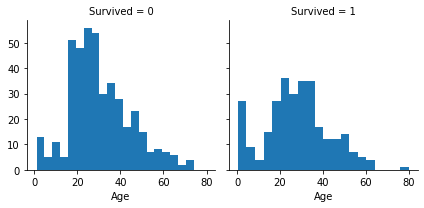

In [ ]:
g = sns.FacetGrid(df_train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


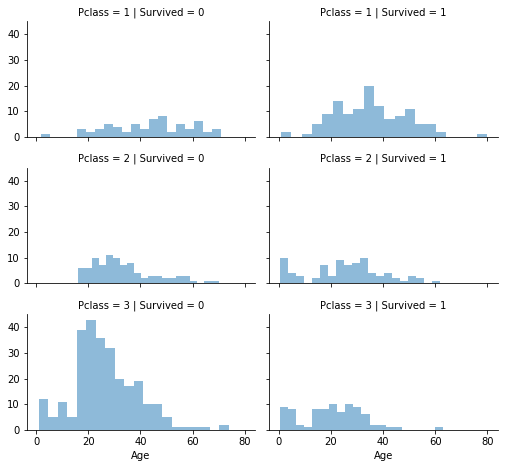

In [ ]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(df_train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [ ]:
df_train.sample(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
591,592,1,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52.0,1,0,36947,78.2667,D20,C
821,822,1,3,"Lulic, Mr. Nikola",male,27.0,0,0,315098,8.6625,NaN,S
281,282,0,3,"Olsson, Mr. Nils Johan Goransson",male,28.0,0,0,347464,7.8542,NaN,S
495,496,0,3,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,NaN,S
336,337,0,1,"Pears, Mr. Thomas Clinton",male,29.0,1,0,113776,66.6000,C2,S


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:648: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


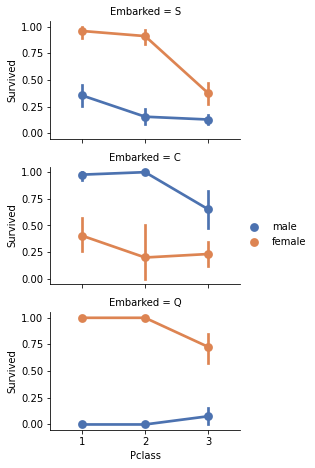

In [ ]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(df_train, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


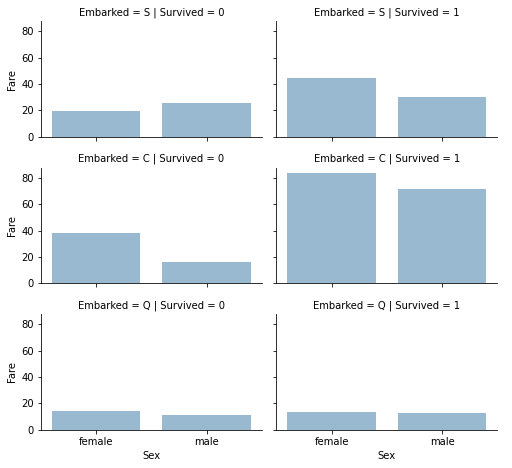

In [ ]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(df_train, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [ ]:
df_train=df_train.drop(['Ticket', 'Cabin'], axis=1)
df_test = df_test.drop(['Ticket', 'Cabin'], axis=1)



In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [ ]:
df_train.shape

(891, 10)

In [ ]:
combina=[df_train,df_test]

In [ ]:
for datasett in combina:
    datasett['Title'] = datasett.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(df_train['Title'], df_train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [ ]:
for datasett in combina:
    datasett['Title'] = datasett['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    datasett['Title'] = datasett['Title'].replace('Mlle', 'Miss')
    datasett['Title'] = datasett['Title'].replace('Ms', 'Miss')
    datasett['Title'] = datasett['Title'].replace('Mme', 'Mrs')
    
df_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived',ascending=False)


,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [ ]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for datasett in combina:
    datasett['Title'] = datasett['Title'].map(title_mapping)
    datasett['Title'] = datasett['Title'].fillna(0)

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [ ]:
df_train.sample(4)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
504,1,1,0,16.0,0,0,86.5000,S,2
588,0,3,1,22.0,0,0,8.0500,S,1
124,0,1,1,54.0,0,1,77.2875,S,1
640,0,3,1,20.0,0,0,7.8542,S,1


In [ ]:
df_train = df_train.drop(['Name', 'PassengerId'], axis=1)
df_test = df_test.drop(['Name'], axis=1)
combina = [df_train, df_test]
df_train.shape, df_test.shape

((891, 9), (418, 9))

KeyError: ignored

In [ ]:
# hajet mouhema : age ,title ,ebarked , pc class , sibsp and parch 
#encoding sex 
combina=[df_train,df_test]


In [ ]:
dataset_f=pd.concat(combina)

In [ ]:
dataset_f.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,PassengerId
0,0.0,3,male,22.0,1,0,7.2500,S,1,NaN
1,1.0,1,female,38.0,1,0,71.2833,C,3,NaN
2,1.0,3,female,26.0,0,0,7.9250,S,2,NaN
3,1.0,1,female,35.0,1,0,53.1000,S,3,NaN
4,0.0,3,male,35.0,0,0,8.0500,S,1,NaN


In [ ]:
dataset_f = dataset_f.drop([ 'PassengerId'], axis=1)


In [ ]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,1


In [ ]:
for dataset_f in combina :
  dataset_f['Sex']=dataset_f['Sex'].map({'female':0,'male':1}).astype(int)
dataset_f.head()

#female0 
#male 1


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,1,34.5,0,0,7.8292,Q,1
1,893,3,0,47.0,1,0,7.0000,S,3
2,894,2,1,62.0,0,0,9.6875,Q,1
3,895,3,1,27.0,0,0,8.6625,S,1
4,896,3,0,22.0,1,1,12.2875,S,3


In [ ]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,S,1
1,1,1,0,38.0,1,0,71.2833,C,3
2,1,3,0,26.0,0,0,7.9250,S,2
3,1,1,0,35.0,1,0,53.1000,S,3
4,0,3,1,35.0,0,0,8.0500,S,1


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


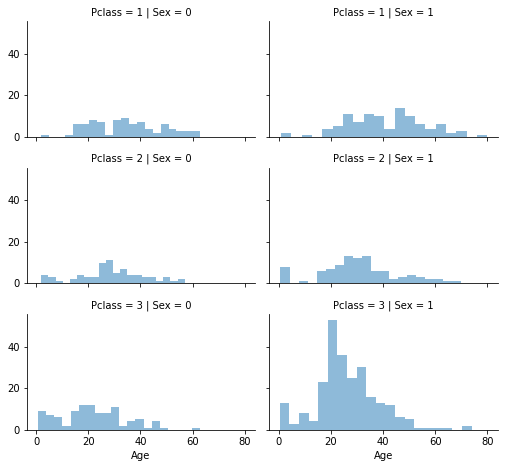

In [ ]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(df_train, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [ ]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
for dataset_f in combina:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset_f[(dataset_f['Sex'] == i) & \
                                  (dataset_f['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset_f.loc[ (dataset_f.Age.isnull()) & (dataset_f.Sex == i) & (dataset_f.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset_f['Age'] = dataset_f['Age'].astype(int)


In [ ]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22,1,0,7.2500,S,1
1,1,1,0,38,1,0,71.2833,C,3
2,1,3,0,26,0,0,7.9250,S,2
3,1,1,0,35,1,0,53.1000,S,3
4,0,3,1,35,0,0,8.0500,S,1


In [ ]:
df_train['AgeBand'] = pd.cut(df_train['Age'], 5)
df_train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [ ]:
for dataset_f in combina:    
    dataset_f.loc[ dataset_f['Age'] <= 16, 'Age'] = 0
    dataset_f.loc[(dataset_f['Age'] > 16) & (dataset_f['Age'] <= 32), 'Age'] = 1
    dataset_f.loc[(dataset_f['Age'] > 32) & (dataset_f['Age'] <= 48), 'Age'] = 2
    dataset_f.loc[(dataset_f['Age'] > 48) & (dataset_f['Age'] <= 64), 'Age'] = 3
    dataset_f.loc[ dataset_f['Age'] > 64, 'Age']
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,1,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,0,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,0,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,0,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,1,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [ ]:
df_train = df_train.drop(['AgeBand'], axis=1)
combina = [df_train, df_test]
df_train.head()

KeyError: ignored

In [ ]:
for dataset_f in combina:
    dataset_f['FamilySize'] = dataset_f['SibSp'] + dataset_f['Parch'] + 1

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [ ]:
for dataset_f in combina:
    dataset_f['IsAlone'] = 0
    dataset_f.loc[dataset_f['FamilySize'] == 1, 'IsAlone'] = 1

df_train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [ ]:
df_train=df_train.drop(['Parch','SibSp','FamilySize'],axis=1)
df_test=df_test.drop(['Parch','SibSp','FamilySize'],axis=1)
combina=[df_train,df_test]

In [ ]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,1,1,7.2500,S,1,0
1,1,1,0,2,71.2833,C,3,0
2,1,3,0,1,7.9250,S,2,1
3,1,1,0,2,53.1000,S,3,0
4,0,3,1,2,8.0500,S,1,1


In [ ]:
#We can also create an artificial feature combining Pclass and Age.
for dataset_f in combina:
    dataset_f['Age*Class'] = dataset_f.Age * dataset_f.Pclass

df_train.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [ ]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,1,1,7.2500,S,1,0,3
1,1,1,0,2,71.2833,C,3,0,2
2,1,3,0,1,7.9250,S,2,1,3
3,1,1,0,2,53.1000,S,3,0,2
4,0,3,1,2,8.0500,S,1,1,6


In [ ]:
freq_port = df_train.Embarked.dropna().mode()[0]
freq_port

'S'

In [ ]:
dataset_f.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           1
Embarked       0
Title          0
IsAlone        0
Age*Class      0
dtype: int64

In [ ]:
for dataset_f in combina:
    dataset_f['Embarked'] = dataset_f['Embarked'].fillna(freq_port)
    
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [ ]:
#Converting categorical feature to numeric
for dataset_f in combina:
    dataset_f['Embarked'] = dataset_f['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,1,1,7.2500,0,1,0,3
1,1,1,0,2,71.2833,1,3,0,2
2,1,3,0,1,7.9250,0,2,1,3
3,1,1,0,2,53.1000,0,3,0,2
4,0,3,1,2,8.0500,0,1,1,6


In [ ]:
dataset_f.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,1,2,7.8292,2,1,1,6
1,893,3,0,2,7.0000,0,3,0,6
2,894,2,1,3,9.6875,2,1,1,6
3,895,3,1,1,8.6625,0,1,1,3
4,896,3,0,1,12.2875,0,3,0,3


In [ ]:
dataset_f.tail()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
413,1305,3,1,1,8.0500,0,1,1,3
414,1306,1,0,2,108.9000,1,5,1,2
415,1307,3,1,2,7.2500,0,1,1,6
416,1308,3,1,1,8.0500,0,1,1,3
417,1309,3,1,1,22.3583,1,4,0,3


In [ ]:
df_train.tail()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
886,0,2,1,1,13.00,0,5,1,2
887,1,1,0,1,30.00,0,2,1,1
888,0,3,0,1,23.45,0,2,0,3
889,1,1,1,1,30.00,1,1,1,1
890,0,3,1,1,7.75,2,1,1,3


In [ ]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           1
Embarked       0
Title          0
IsAlone        0
Age*Class      0
dtype: int64

In [ ]:
dataset.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [ ]:
df_test['Fare'].fillna(df_test['Fare'].dropna().median(),inplace=True)
# fill the nun data in fare of test df 
df_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Title          0
IsAlone        0
Age*Class      0
dtype: int64

In [ ]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,1,1,7.2500,0,1,0,3
1,1,1,0,2,71.2833,1,3,0,2
2,1,3,0,1,7.9250,0,2,1,3
3,1,1,0,2,53.1000,0,3,0,2
4,0,3,1,2,8.0500,0,1,1,6


In [ ]:
df_test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,1,2,7.8292,2,1,1,6
1,893,3,0,2,7.0000,0,3,0,6
2,894,2,1,3,9.6875,2,1,1,6
3,895,3,1,1,8.6625,0,1,1,3
4,896,3,0,1,12.2875,0,3,0,3


In [ ]:
# create a fare band 
df_train['FareBand'] = pd.qcut(df_train['Fare'], 4)
df_train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [ ]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class,FareBand
0,0,3,1,1,7.2500,0,1,0,3,"(-0.001, 7.91]"
1,1,1,0,2,71.2833,1,3,0,2,"(31.0, 512.329]"
2,1,3,0,1,7.9250,0,2,1,3,"(7.91, 14.454]"
3,1,1,0,2,53.1000,0,3,0,2,"(31.0, 512.329]"
4,0,3,1,2,8.0500,0,1,1,6,"(7.91, 14.454]"


In [ ]:
for dataset_f in combina:
    dataset_f.loc[ dataset_f['Fare'] <= 7.91, 'Fare'] = 0
    dataset_f.loc[(dataset_f['Fare'] > 7.91) & (dataset_f['Fare'] <= 14.454), 'Fare'] = 1
    dataset_f.loc[(dataset_f['Fare'] > 14.454) & (dataset_f['Fare'] <= 31), 'Fare']   = 2
    dataset_f.loc[ dataset_f['Fare'] > 31, 'Fare'] = 3
    dataset_f['Fare'] = dataset_f['Fare'].astype(int)

df_train = df_train.drop(['FareBand'], axis=1)
combina = [df_train, df_test]
    
df_train.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,1,1,0,0,1,0,3
1,1,1,0,2,3,1,3,0,2
2,1,3,0,1,1,0,2,1,3
3,1,1,0,2,3,0,3,0,2
4,0,3,1,2,1,0,1,1,6
5,0,3,1,1,1,2,1,1,3
6,0,1,1,3,3,0,1,1,3
7,0,3,1,0,2,0,4,0,0
8,1,3,0,1,1,0,3,0,3
9,1,2,0,0,2,1,3,0,0


In [ ]:
df_test

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,1,2,0,2,1,1,6
1,893,3,0,2,0,0,3,0,6
2,894,2,1,3,1,2,1,1,6
3,895,3,1,1,1,0,1,1,3
4,896,3,0,1,1,0,3,0,3
...,...,...,...,...,...,...,...,...,...
413,1305,3,1,1,1,0,1,1,3
414,1306,1,0,2,3,1,5,1,2
415,1307,3,1,2,0,0,1,1,6
416,1308,3,1,1,1,0,1,1,3


In [ ]:
#our DATA IS READYYYYYYYYYYYYYYYYYYYYYYYYYYYYYY#########################################

#Machine Learning !!!!!!!!!!!!!!!!!!!

In [ ]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

#Data preparation 

In [ ]:
features=df_train.drop('Survived',axis=1)
labels=df_train['Survived']


In [ ]:
X_train = df_train.drop("Survived", axis=1)
y_train = df_train["Survived"]
X_test  = df_test.drop("PassengerId", axis=1).copy()
X_train.shape, y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

#Predicting

In [ ]:
# Logistic Regression 
log = LogisticRegression()
log.fit(X_train, y_train)
y_pred = log.predict(X_test)
acc_log = round(log.score(X_train, y_train), 4)
acc_log

0.8036

In [ ]:
coeff_df = pd.DataFrame(df_train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(log.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
5,Title,0.398018
2,Age,0.287078
4,Embarked,0.261586
6,IsAlone,0.126717
3,Fare,-0.086784
7,Age*Class,-0.311138
0,Pclass,-0.750791
1,Sex,-2.201548


In [ ]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) , 4)
acc_svc

0.7823

In [ ]:
# knn
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train), 4)
acc_knn

0.8474

In [ ]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train), 4)
acc_gaussian

0.7228

In [ ]:
# Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train), 4)
acc_perceptron

0.7924

In [ ]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train), 4)
acc_linear_svc

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7912

In [ ]:
 #Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train), 4)
acc_sgd

0.7587

In [ ]:
# Decision Tree algorithm
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train), 4)
acc_decision_tree

0.8676

In [ ]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train), 4)
acc_random_forest

0.8676

In [ ]:
# statistic Models 

models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)


,Model,Score
3,Random Forest,0.8676
8,Decision Tree,0.8676
1,KNN,0.8474
2,Logistic Regression,0.8036
5,Perceptron,0.7924
7,Linear SVC,0.7912
0,Support Vector Machines,0.7823
6,Stochastic Gradient Decent,0.7587
4,Naive Bayes,0.7228


In [ ]:
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": Y_pred
    })
# submission.to_csv('../output/submission.csv', index=False)

In [ ]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
submission.to_csv('titanicc.csv', index=False)

In [ ]:
# finally 